# Big Picture

Support Vector Machines work by taking in data and trying to create the best decision boundary that allows for classification. There are often many different hyperplanes that would be useful in classifying data but SVMs look for the one with the maximum distance between its nearest points on both sides of the boundary. I think it would work really well with the Iris Dataset and am looking forward to figure out how to use it on multiclass data.

# Getting the Data 

I chose this data specifically because it was multiclass data. I wanted to see if I would be able to get the SVM to work for multiclass classification. The iris data set also has less features. I had some trouble in the previous project with visualizing and understanding the data so I wanted to use a data set that I would have less trouble with.

URL: https://www.kaggle.com/uciml/iris

In [6]:
import pandas as pd
import numpy as np
import pylab as pl
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('ggplot') # Have a nicer style of the plots

iris = pd.read_csv('Iris.csv')

In [7]:
import os
size = os.path.getsize('Iris.csv')
size

5107

The file for the Iris data set is 5 KB

In [8]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


There are 150 entries in this data set. There are 6 columns with 5 of them being features and one being an ID column. The features are SepalLength, SepalWidth, PetalLength, PetalWidth, and Species. The first 4 features are numerical data and the last feature is categorical and will be the label for our data.

In [9]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Looking at a snapshot of the data we can see that ther is no missing data. We can see the mean, std, and percentiles of the numerical data. Nothing looks too out of the ordinary there. One thing that does look like it could be a problem is the ID column. It looks like the species data is in order with setosa being first. We probably will need to drop the ID column as it would artifically help our classifier.

# Non-Linear Separation Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000293A84E0CF8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000293A8DA0B70>]], dtype=object)

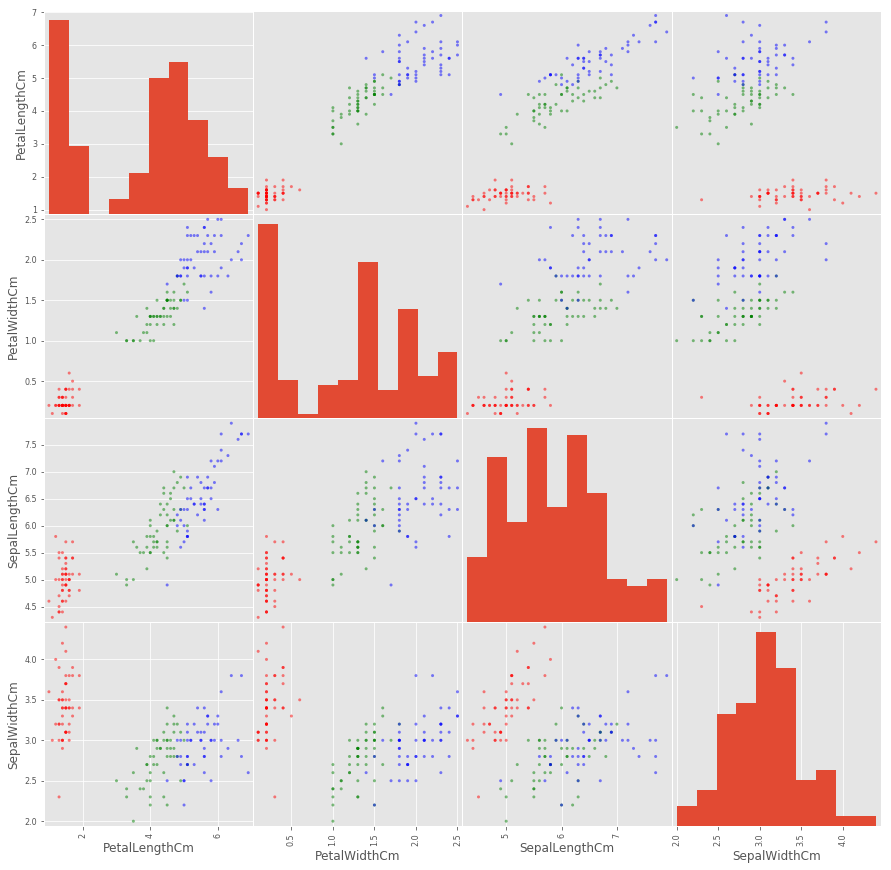

In [11]:
from pandas.plotting import scatter_matrix

pl = iris['PetalLengthCm']
pw = iris['PetalWidthCm']
sl = iris['SepalLengthCm']
sw = iris['SepalWidthCm']
clas = iris['Species']
columns = ['PetalLengthCm', 'PetalWidthCm', 'SepalLengthCm', 'SepalWidthCm']
color = ['red' if l == 'Iris-setosa' else 'blue' if l == 'Iris-virginica' else 'green' for l in clas]
data = pd.DataFrame(iris, columns=columns)
scatter_matrix(data,c=color,figsize=(15,15))


Looking at the scatter plots of all the pairings of fetures we can see that there is definitely linear separation in our data. It looks like the Iris Setosa class we be the easiest to classify while the boundary between the other two species will be a little harder to define. The fact that there is linear separation is good because we do not need to apply any polynomial transformations or anything of the sort and can instead go ahead an use a linear SVM.

# Scaling the Data and Prepping it 

It is very important to scale data with SVMs because they are sensitive to feature scaling. Using feature scaling can give use the widest gap in our boundary and will give better performance.

In [12]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(iris[columns])
iris[columns] = scaler.transform(iris[columns])

In [13]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,75.500000,-2.775558e-16,-5.140333e-16,1.154632e-16,9.251859e-16
std,43.445368,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,1.000000,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00
25%,38.250000,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00
50%,75.500000,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01
75%,112.750000,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01
max,150.000000,2.492019e+00,3.114684e+00,1.786341e+00,1.710902e+00


We can see that the Standar Scaler has scaled the numerical features so that the mean is 0 and the standard deviation is 1 with a guassian distribution. Now we can move on to splitting the data for the classifiers.

In [14]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(iris)

x_train = train_set.drop(['Species'], axis=1)
y_train = train_set['Species']
x_test = test_set.drop(['Species'], axis=1)
y_test = test_set['Species']

# Trying Classifiers

#### NOTE: I do not use ROC Curves and AUC for these classifiers as it is multiclass data and my attempts to restructure the data so that a curve could be made were not working

## SVC

In [15]:
from sklearn import svm
svc = svm.SVC()
svc.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [16]:
from sklearn.model_selection import cross_val_predict

y_test_pred = cross_val_predict(svc, x_test, y_test, cv=3)

In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred)

array([[ 2,  0,  7],
       [ 0, 13,  1],
       [ 0,  1, 14]], dtype=int64)

In [18]:
from sklearn.metrics import precision_score

precision_score(y_test, y_test_pred, average=None)

array([ 1.        ,  0.92857143,  0.63636364])

In [19]:
from sklearn.metrics import recall_score

recall_score(y_test, y_test_pred, average=None)

array([ 0.22222222,  0.92857143,  0.93333333])

In [20]:
from sklearn.metrics import f1_score
f1_score(y_test, y_test_pred, average=None)

array([ 0.36363636,  0.92857143,  0.75675676])

## NuSVC

In [21]:
from sklearn import svm
svc = svm.NuSVC()
svc.fit(x_train, y_train)

NuSVC(cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
   max_iter=-1, nu=0.5, probability=False, random_state=None,
   shrinking=True, tol=0.001, verbose=False)

In [22]:
from sklearn.model_selection import cross_val_predict

y_test_pred = cross_val_predict(svc, x_test, y_test, cv=3)

In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred)

array([[ 3,  0,  6],
       [ 0, 13,  1],
       [ 0,  1, 14]], dtype=int64)

In [24]:
from sklearn.metrics import precision_score

precision_score(y_test, y_test_pred, average=None)

array([ 1.        ,  0.92857143,  0.66666667])

In [25]:
from sklearn.metrics import recall_score

recall_score(y_test, y_test_pred, average=None)

array([ 0.33333333,  0.92857143,  0.93333333])

In [26]:
from sklearn.metrics import f1_score
f1_score(y_test, y_test_pred, average=None)

array([ 0.5       ,  0.92857143,  0.77777778])

## LinearSVC

In [75]:
from sklearn import svm
svc = svm.LinearSVC()
svc.fit(x_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [76]:
from sklearn.model_selection import cross_val_predict

y_test_pred = cross_val_predict(svc, x_test, y_test, cv=3)

In [77]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred)

array([[ 9,  0,  0],
       [ 0, 12,  2],
       [ 0, 11,  4]], dtype=int64)

In [78]:
from sklearn.metrics import precision_score

precision_score(y_test, y_test_pred, average=None)

array([ 1.        ,  0.52173913,  0.66666667])

In [79]:
from sklearn.metrics import recall_score

recall_score(y_test, y_test_pred, average=None)

array([ 1.        ,  0.85714286,  0.26666667])

In [80]:
from sklearn.metrics import f1_score
f1_score(y_test, y_test_pred, average=None)

array([ 1.        ,  0.64864865,  0.38095238])

## SGD Classifier

In [81]:
from sklearn.linear_model import SGDClassifier

sgdcl = SGDClassifier()
sgdcl.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [82]:
from sklearn.model_selection import cross_val_predict

y_test_pred = cross_val_predict(svc, x_test, y_test, cv=3)

In [83]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred)

array([[ 9,  0,  0],
       [ 2, 12,  0],
       [ 0, 11,  4]], dtype=int64)

In [84]:
from sklearn.metrics import precision_score

precision_score(y_test, y_test_pred, average=None)

array([ 0.81818182,  0.52173913,  1.        ])

In [85]:
from sklearn.metrics import recall_score

recall_score(y_test, y_test_pred, average=None)

array([ 1.        ,  0.85714286,  0.26666667])

In [74]:
from sklearn.metrics import f1_score
f1_score(y_test, y_test_pred, average=None)

array([ 1.        ,  0.53846154,  0.625     ])

In [149]:
from sklearn.metrics import roc_curve

y_scores = cross_val_predict(svc, x_test, y_test, cv=3,
                             method="decision_function")
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

ValueError: multiclass format is not supported

## Results

I did not mess with the values of C because I felt like checking how the default worked at first. I did not change Coef0 at all because my data was not polynomial so tinkering with Coef0 was not needed.

Suprisingly the SGD Classifier and the LinearSVC did the worst at classifiying. The SVC and the NuSVC performed the best and they had identical results. I know that the NuSVC and SVC are very similar so that is probably why they performed the same. I don't know why the LinearSVC and SGD did so poorly but I beleive it has to do with the Virginica and Versicolor being so similar and the Setosa being more easily separated as I discussed above. I was able to get the LinearSVC and SGD to have nearly the same results. 

# Integrating an RBF Kernel

#### NOTE: This project was done in order so rather than restructing the project to integrate the RBF Kernel here I will discuss what I found when I got to this step.

After doing a little more research into the SVC, NuSVC, and LinearSVC documentation I realized that integrating an RBF kernel had already been done in the SVC and NuSVC classifiers but not in the LinearSVC. This is why it performed poorly in comparison. I will instead try to modify the C and Gamma parameters of the SVC to see the effect.

## Increasing C

In [117]:
from sklearn import svm
svc = svm.SVC(C=5)
svc.fit(x_train, y_train)

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [118]:
from sklearn.model_selection import cross_val_predict

y_test_pred = cross_val_predict(svc, x_test, y_test, cv=3)

In [119]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred)

array([[ 3,  0,  6],
       [ 0, 13,  1],
       [ 0,  1, 14]], dtype=int64)

In [120]:
from sklearn.metrics import precision_score

precision_score(y_test, y_test_pred, average=None)

array([ 1.        ,  0.92857143,  0.66666667])

In [121]:
from sklearn.metrics import recall_score

recall_score(y_test, y_test_pred, average=None)

array([ 0.33333333,  0.92857143,  0.93333333])

In [122]:
from sklearn.metrics import f1_score
f1_score(y_test, y_test_pred, average=None)

array([ 0.5       ,  0.92857143,  0.77777778])

## Decreasing C

In [131]:
from sklearn import svm
svc = svm.SVC(C=0.5)
svc.fit(x_train, y_train)

SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [132]:
from sklearn.model_selection import cross_val_predict

y_test_pred = cross_val_predict(svc, x_test, y_test, cv=3)

In [133]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred)

array([[ 0,  0,  9],
       [ 0,  7,  7],
       [ 0,  0, 15]], dtype=int64)

In [134]:
from sklearn.metrics import precision_score

precision_score(y_test, y_test_pred, average=None)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([ 0.        ,  1.        ,  0.48387097])

In [135]:
from sklearn.metrics import recall_score

recall_score(y_test, y_test_pred, average=None)

array([ 0. ,  0.5,  1. ])

In [136]:
from sklearn.metrics import f1_score
f1_score(y_test, y_test_pred, average=None)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([ 0.        ,  0.66666667,  0.65217391])

## Increasing Gamma

In [137]:
from sklearn.model_selection import cross_val_predict

y_test_pred = cross_val_predict(svc, x_test, y_test, cv=3)

In [138]:
from sklearn import svm
svc = svm.SVC(gamma=0.5)
svc.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [139]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred)

array([[ 0,  0,  9],
       [ 0,  7,  7],
       [ 0,  0, 15]], dtype=int64)

In [140]:
from sklearn.metrics import precision_score

precision_score(y_test, y_test_pred, average=None)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([ 0.        ,  1.        ,  0.48387097])

In [141]:
from sklearn.metrics import recall_score

recall_score(y_test, y_test_pred, average=None)

array([ 0. ,  0.5,  1. ])

In [142]:
from sklearn.metrics import f1_score
f1_score(y_test, y_test_pred, average=None)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([ 0.        ,  0.66666667,  0.65217391])

## Decreasing Gamma

In [143]:
from sklearn import svm
svc = svm.SVC(gamma=0.05)
svc.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.05, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [144]:
from sklearn.model_selection import cross_val_predict

y_test_pred = cross_val_predict(svc, x_test, y_test, cv=3)

In [145]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred)

array([[ 7,  1,  1],
       [ 0, 14,  0],
       [ 0,  2, 13]], dtype=int64)

In [146]:
from sklearn.metrics import precision_score

precision_score(y_test, y_test_pred, average=None)

array([ 1.        ,  0.82352941,  0.92857143])

In [147]:
from sklearn.metrics import recall_score

recall_score(y_test, y_test_pred, average=None)

array([ 0.77777778,  1.        ,  0.86666667])

In [148]:
from sklearn.metrics import f1_score
f1_score(y_test, y_test_pred, average=None)

array([ 0.875     ,  0.90322581,  0.89655172])

## Results

After messing around with the values of C and Gamma I realized that there was still some tuning that could be done to the model. With the value of C, increasing it did nothing to the results, but decreasing it significantly worsened the results. With gamma, increasing it made results worse while decreasing it a tiny bit made the results almost perfect. It looks like C of 1 and Gamma of 0.05 rather than 0.25 is the best set of hyperparamters for the SVC.

# Presenting the Solution

Pitch: The Iris data set has three different species of flowers. When you plot out the data you can see that there is definitely separation in the three classes and what better way to make use of that separation than an SVM. An SVM would be able to find the best decision boundary between the classes to help create the best classfier for the Iris data set. After doing some tuning with different types of SVM classifiers, I found that the SVC classifier with C set at 1 and Gamma set at 0.05 delivered near perfect results. I think that going forward the best classifier for new Iris data would be the model that I have created.


What I've Learned: SVM classification isn't as hard as I thought it out to be. I think that I was able to grasp the concept quite well and I could have been a little more ambitious than I already was and perhaps tried out multilabel classification. I learned a lot about the hyperparameters of the SVM classifiers but there's always more to learn.


# Future of the System

More Data?

I think that in this case particularly it would be absolutely necessary to get more data. I started with a small data set in the beginning because I wanted to experiment with multiclass data and not run into a lot of issues with it being multiclass. I think that I overestimated how hard it would be as the only problem I ran into was the ROC Curve, so I think that we could have used more data and more features in this system for sure.

Future of the System?

I think that this system does not need as much upkeep as other models would. The iris data is static. There isn't really a lot of changing data so once we got a well-tuned enough model it would be good enough that we wouldn't need to continually improving upon it.

Satisfied?

I think I am pretty satisfied with my first attempt at SVM classification. I took a rish trying to do multiclass classification which was new for me and it paid off and I didn't run into too many obstacles. I wasn't too satisfied with not being able to create ROC Curves. I realize that ROC Curves don't really work as well with multiclass data but I feel like there is some workaround for that and someone must have figured out a way to get around it. If I had some more time I would have definitely focused on that and also on understanding more about the different SVM classifiers and their hyperparameters.

